In [1]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model

In [2]:
model = Sequential()
inputShape = (32, 32, 3)
chanDim = -1

# if we are using "channels first", update the input shape
# and channels dimension
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1

# first CONV => RELU => CONV => RELU => POOL layer set
model.add(Conv2D(16, (3, 3), padding="same",
input_shape=inputShape, name="Conv2D_1"))
model.add(Activation("relu", name='ReLU_1'))
model.add(BatchNormalization(axis=chanDim, name='Batch_Normalizer_1'))
model.add(Conv2D(16, (3, 3), padding="same", name='Conv2D_2'))
model.add(Activation("relu", name='ReLU_2'))
model.add(BatchNormalization(axis=chanDim, name='Batch_Normalizer_2'))
model.add(MaxPooling2D(pool_size=(2, 2), name='Max_Pooling_set_1'))
model.add(Dropout(0.25, name='dropout_1_025'))

# second CONV => RELU => CONV => RELU => POOL layer set
model.add(Conv2D(32, (3, 3), padding="same", name='Conv2D_3'))
model.add(Activation("relu", name='ReLU_3'))
model.add(BatchNormalization(axis=chanDim, name='Batch_Normalizer_3'))
model.add(Conv2D(32, (3, 3), padding="same", name='Conv2D_4'))
model.add(Activation("relu", name='ReLU_4'))
model.add(BatchNormalization(axis=chanDim, name='Batch_Normalizer_4'))
model.add(MaxPooling2D(pool_size=(2, 2), name='Max_Pooling_set_2'))
model.add(Dropout(0.25, name='dropout_2_025'))

# first (and only) set of FC => RELU layers
model.add(Flatten(name='Flatten'))
model.add(Dense(64, name='Dense'))
model.add(Activation("relu", name='ReLU'))
model.add(BatchNormalization(name='Batch_Normalizer'))
model.add(Dropout(0.5, name='dropout_3_05'))

# softmax classifier
model.add(Dense(2, name='Predictions'))
model.add(Activation("softmax", name='Softmax'))

In [3]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_1 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 ReLU_1 (Activation)         (None, 32, 32, 16)        0         
                                                                 
 Batch_Normalizer_1 (BatchNo  (None, 32, 32, 16)       64        
 rmalization)                                                    
                                                                 
 Conv2D_2 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 ReLU_2 (Activation)         (None, 32, 32, 16)        0         
                                                                 
 Batch_Normalizer_2 (BatchNo  (None, 32, 32, 16)       64        
 rmalization)                                           

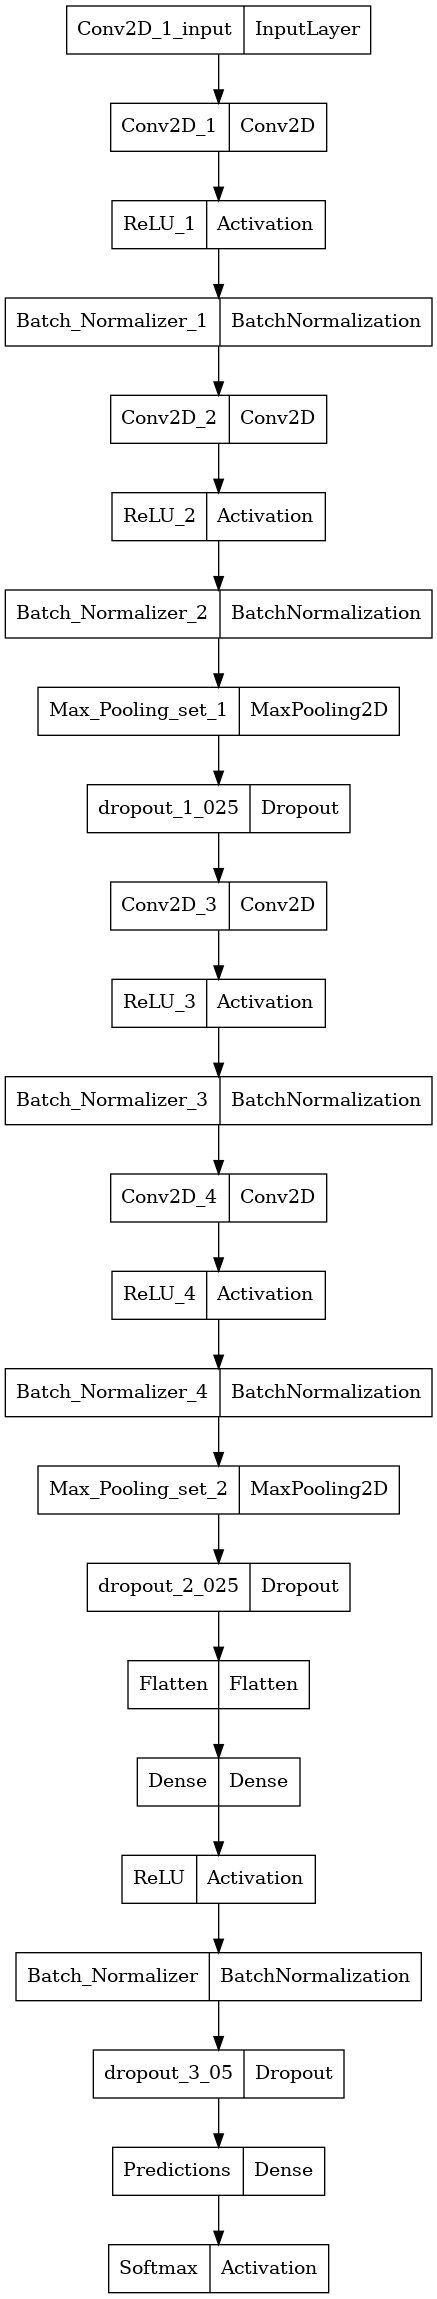

In [20]:
# Plot network
plot_model(model, "model.png", dpi=96)
